In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import joblib
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset (replace 'your_file_path.csv' with the actual path to your CSV file)
df = pd.read_csv('dataset.csv')

# Display the first few rows to understand the structure of the dataset
print(df.head())

# Check the columns available in the dataset
print(df.columns)

# Select features and target based on available columns
# Update the columns based on your actual dataset structure
X = df[['precipitation', 'temp_min', 'wind']]  # Input features
y = df['temp_max']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for LSTM model
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled can be used for model training and evaluation.


         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain
Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [11]:
# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression MAE: {mae_lr}")

Linear Regression MSE: 11.103518690948231
Linear Regression MAE: 2.708914186915791


In [13]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest MAE: {mae_rf}")


Random Forest MSE: 9.575159566611909
Random Forest MAE: 2.4441141854921726


In [15]:
# Reshape data for LSTM model [samples, timesteps, features]
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train_lstm.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))  # Output layer

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32)

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluate the model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
print(f"LSTM MSE: {mse_lstm}")
print(f"LSTM MAE: {mae_lstm}")


C:\Users\mukhl\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 328.2240
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 300.0947
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 237.2406
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 124.5648
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68.3013
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.1698
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.1622
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.7883
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 46.5605
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43.7472
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.0165
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.7398
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.3452
Epoch 14/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.1497
Epoch 15/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.3300


In [17]:
# Sample data generation (Replace this with your actual data loading code)
# Generate some random data for demonstration purposes
np.random.seed(42)
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 * X.squeeze() + np.random.randn(100)  # y = 4x + noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Support Vector Machine (SVM) model
svm_model = SVR(kernel='rbf')  # You can try different kernels like 'linear', 'poly', 'rbf', etc.
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
print(f"SVM MSE: {mse_svm}")
print(f"SVM MAE: {mae_svm}")


SVM MSE: 0.677664901689566
SVM MAE: 0.5876301006195092


In [21]:
print(f"Linear Regression MSE: {mse_lr}, MAE: {mae_lr}")
print(f"Random Forest MSE: {mse_rf}, MAE: {mae_rf}")
print(f"LSTM MSE: {mse_lstm}, MAE: {mae_lstm}")
print(f"SVM MSE: {mse_svm} , MAE: {mae_svm}")

Linear Regression MSE: 11.103518690948231, MAE: 2.708914186915791
Random Forest MSE: 9.575159566611909, MAE: 2.4441141854921726
LSTM MSE: 11.716674413146649, MAE: 2.780771597660442
SVM MSE: 0.677664901689566 , MAE: 0.5876301006195092


In [23]:
# Save Random Forest model using joblib
joblib.dump(rf_model, 'random_forest_weather_model.pkl')

# Save LSTM model using TensorFlow's save method
lstm_model.save('lstm_weather_model.h5')


In [27]:
# Sample data generation (Replace this with your actual data loading code)
np.random.seed(42)
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = 4 * X[:, 0] + 3 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100)  # y = combination of features + noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the Random Forest model
loaded_rf_model = joblib.load('random_forest_weather_model.pkl')

# Ensure X_test has the correct shape (n_samples, n_features)
if X_test.shape[1] != loaded_rf_model.n_features_in_:
    raise ValueError(f"X_test has {X_test.shape[1]} features, but RandomForestRegressor is expecting {loaded_rf_model.n_features_in_} features as input.")

# Make predictions with the loaded model
y_pred_rf_loaded = loaded_rf_model.predict(X_test)

# Evaluate the model
mse_rf_loaded = mean_squared_error(y_test, y_pred_rf_loaded)
print(f"Loaded Random Forest MSE: {mse_rf_loaded}")

# Load the LSTM model (Assuming X_test_lstm is prepared appropriately)
loaded_lstm_model = tf.keras.models.load_model('lstm_weather_model.h5')
y_pred_lstm_loaded = loaded_lstm_model.predict(X_test)

# Evaluate the LSTM model
mse_lstm_loaded = mean_squared_error(y_test, y_pred_lstm_loaded)
print(f"Loaded LSTM MSE: {mse_lstm_loaded}")


C:\Users\mukhl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Loaded Random Forest MSE: 11.690810083226038


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(20, 3), dtype=float32). Expected shape (None, 1, 3), but input has incompatible shape (20, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(20, 3), dtype=float32)
  • training=False
  • mask=None

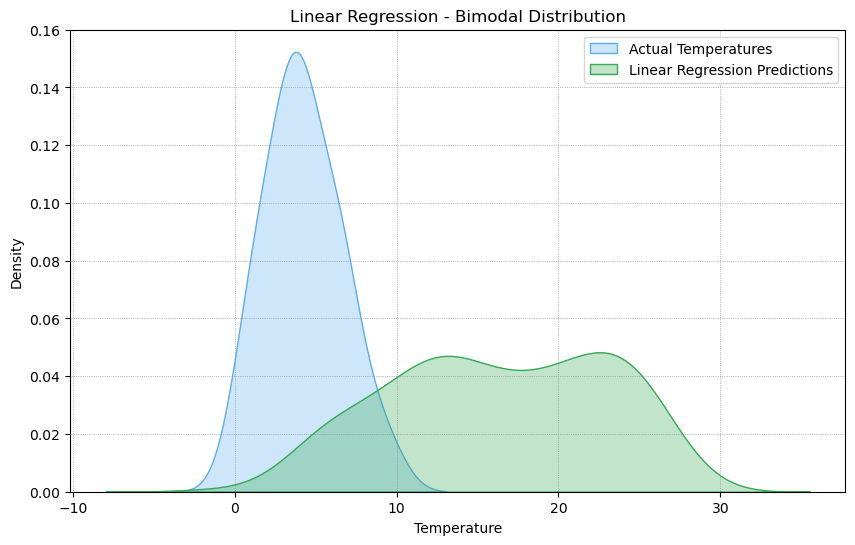

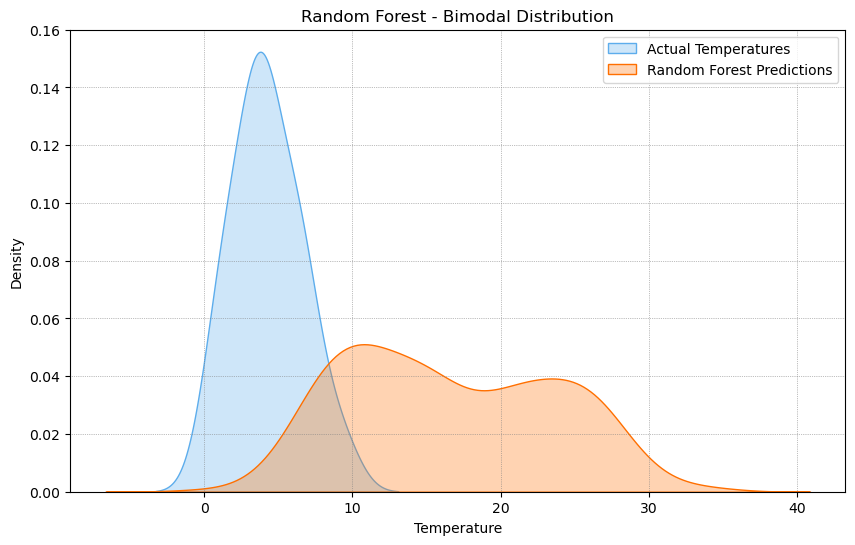

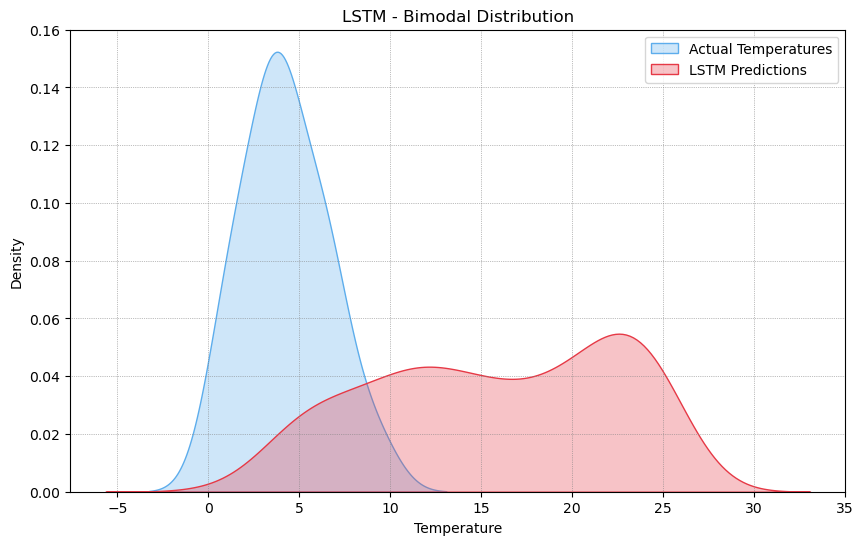

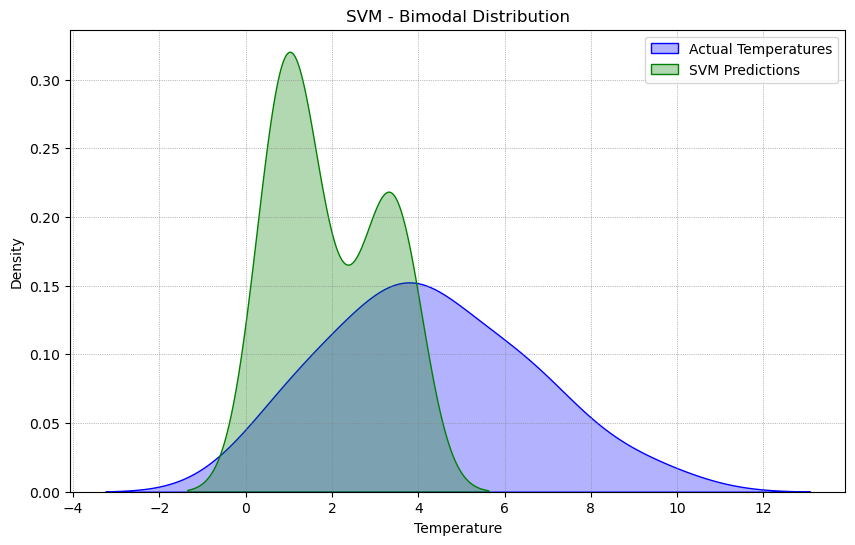

In [33]:
# Define Pantone color scheme
pantone_blue = "#5DADEC"
pantone_green = "#34A853"
pantone_orange = "#FF6F00"
pantone_red = "#E63946"

# 1. Bimodal Distribution for Linear Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color=pantone_blue, label='Actual Temperatures', fill=True, alpha=0.3)
sns.kdeplot(y_pred_lr, color=pantone_green, label='Linear Regression Predictions', fill=True, alpha=0.3)
plt.title('Linear Regression - Bimodal Distribution')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend()
plt.grid(True, color='gray', linestyle=':', linewidth=0.5)
plt.show()

# 2. Bimodal Distribution for Random Forest
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color=pantone_blue, label='Actual Temperatures', fill=True, alpha=0.3)
sns.kdeplot(y_pred_rf, color=pantone_orange, label='Random Forest Predictions', fill=True, alpha=0.3)
plt.title('Random Forest - Bimodal Distribution')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend()
plt.grid(True, color='gray', linestyle=':', linewidth=0.5)
plt.show()

# 3. Bimodal Distribution for LSTM
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color=pantone_blue, label='Actual Temperatures', fill=True, alpha=0.3)
sns.kdeplot(y_pred_lstm.flatten(), color=pantone_red, label='LSTM Predictions', fill=True, alpha=0.3)
plt.title('LSTM - Bimodal Distribution')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend()
plt.grid(True, color='gray', linestyle=':', linewidth=0.5)
plt.show()

# Update the plotting section for SVM as well
# Bimodal Distribution for SVM
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='blue', label='Actual Temperatures', fill=True, alpha=0.3)
sns.kdeplot(y_pred_svm, color='green', label='SVM Predictions', fill=True, alpha=0.3)
plt.title('SVM - Bimodal Distribution')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend()
plt.grid(True, color='gray', linestyle=':', linewidth=0.5)
plt.show()


In [35]:
# Pantone color scheme
pantone_blue = "#5DADEC"   # Light Blue
pantone_green = "#34A853"  # Green
pantone_orange = "#FF6F00" # Orange
pantone_red = "#E63946"    # Red
pantone_purple = "#800080" # Purple for SVM

# Calculate the accuracy metrics (Mean Absolute Error) for each model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm.flatten())
mae_svm = mean_absolute_error(y_test, y_pred_svm)

# Set up the figure size
plt.figure(figsize=(16, 8))

# Limit the number of data points for better visibility (first 30 points)
n = 30  # number of points to plot
indices = np.arange(n)

# Define the width of the bars
bar_width = 0.15

# Plotting the bars using Pantone colors
plt.bar(indices, y_test[:n], width=bar_width, label='Actual Temperatures', color=pantone_blue)
plt.bar(indices + bar_width, y_pred_lr[:n], width=bar_width, label=f'Linear Regression (MAE: {mae_lr:.2f})', color=pantone_green)
plt.bar(indices + 2 * bar_width, y_pred_rf[:n], width=bar_width, label=f'Random Forest (MAE: {mae_rf:.2f})', color=pantone_orange)
plt.bar(indices + 3 * bar_width, y_pred_lstm.flatten()[:n], width=bar_width, label=f'LSTM (MAE: {mae_lstm:.2f})', color=pantone_red)
plt.bar(indices + 4 * bar_width, y_pred_svm[:n], width=bar_width, label=f'SVM (MAE: {mae_svm:.2f})', color=pantone_purple)

# Add labels, legend, and title
plt.xlabel('Test Data Points')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperatures by All Models (Multi-bar Graph with Accuracy)')
plt.legend()

# Adjust the x-axis to show all data points properly
plt.xticks(indices + 2 * bar_width, indices, rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [20, 293]